<a href="https://colab.research.google.com/github/Akshatha7710/travel-route-optimisation/blob/main/Travel_Route_Optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gradient of Bus Travel Time ∇Tb: [2*a*x, 2*b*y]
Gradient of Taxi Travel Time ∇Tt: [2*c*x, 2*c*y]
Bus Fare Function Fb(x): x**2 + x
Taxi Fare Function Ft(x): 3*x**2/2 + 2*x


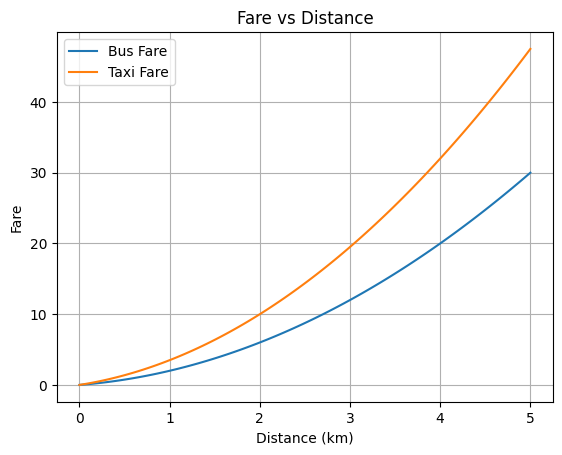

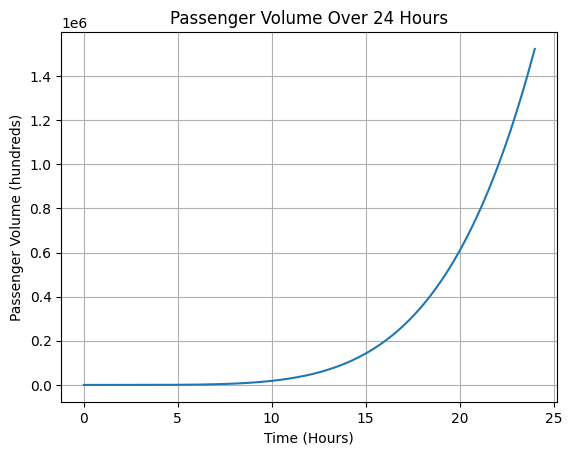

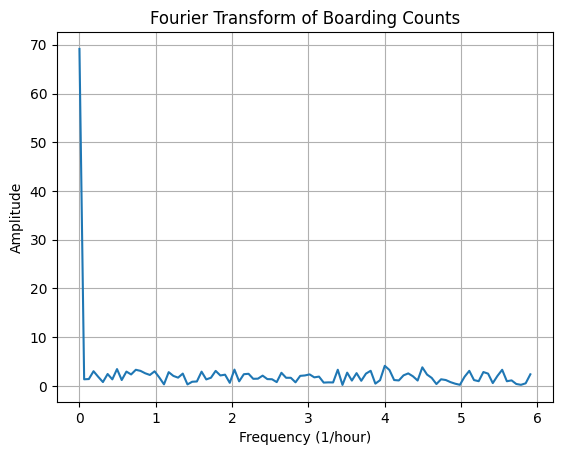

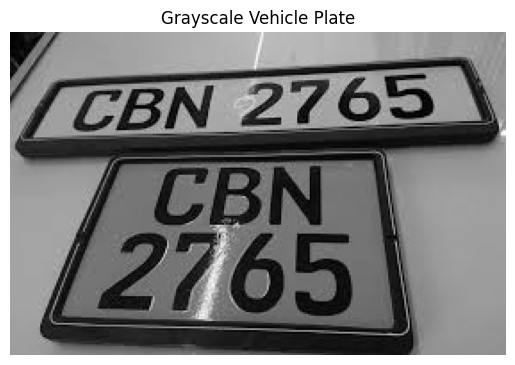

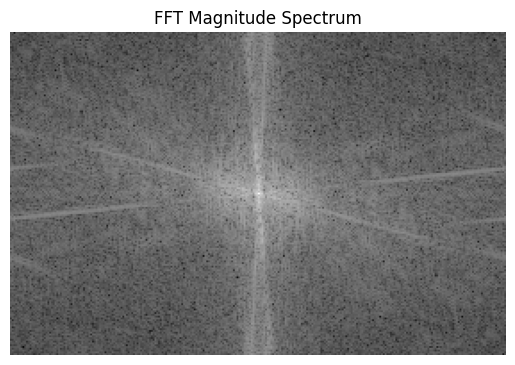

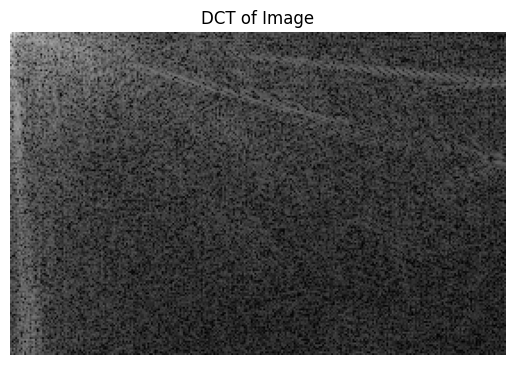

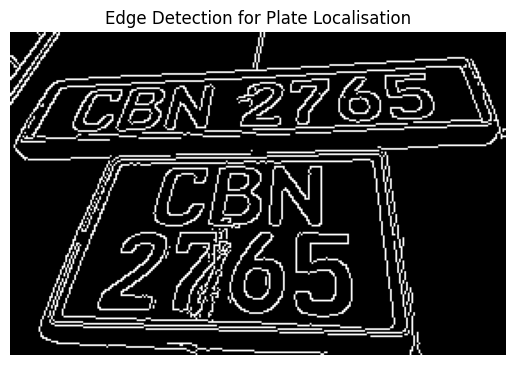

In [3]:
# ============================================================
# CM2607: Advanced Mathematics for Data Science
# Coursework: Optimisation of Travel Routes in Colombo
# Google Colab – Complete Python Code
# ============================================================

# =======================
# IMPORT LIBRARIES
# =======================
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.fftpack import dct
import cv2

# ============================================================
# PROBLEM 1: MODELLING TRAVEL TIME
# ============================================================

# Define symbols
x, y = sp.symbols('x y')
a, b, c = sp.symbols('a b c')

# Travel time models
Tb = a*x**2 + b*y**2
Tt = c*(x**2 + y**2)

# Gradients
grad_Tb = [sp.diff(Tb, x), sp.diff(Tb, y)]
grad_Tt = [sp.diff(Tt, x), sp.diff(Tt, y)]

print("Gradient of Bus Travel Time ∇Tb:", grad_Tb)
print("Gradient of Taxi Travel Time ∇Tt:", grad_Tt)

# ============================================================
# PROBLEM 2: COST ANALYSIS USING INTEGRATION
# ============================================================

t = sp.symbols('t')

# Fare integrals
Fb = sp.integrate(2*t + 1, (t, 0, x))
Ft = sp.integrate(3*t + 2, (t, 0, x))

print("Bus Fare Function Fb(x):", Fb)
print("Taxi Fare Function Ft(x):", Ft)

# Plot fares
x_vals = np.linspace(0, 5, 100)
Fb_vals = [Fb.subs(x, val) for val in x_vals]
Ft_vals = [Ft.subs(x, val) for val in x_vals]

plt.figure()
plt.plot(x_vals, Fb_vals, label="Bus Fare")
plt.plot(x_vals, Ft_vals, label="Taxi Fare")
plt.xlabel("Distance (km)")
plt.ylabel("Fare")
plt.title("Fare vs Distance")
plt.legend()
plt.grid(True)
plt.show()

# ============================================================
# PROBLEM 3: PREDICTING PEAK TRAVEL TIMES (SERIES)
# ============================================================

# Series approximation (first 6 terms)
P = 5 + 4*sp.sin(sp.pi*x) - (3/2)*x**2 + x**3 - (x**4)/4 + (x**5)/5

t_vals = np.linspace(0, 24, 240)
P_vals = [P.subs(x, val) for val in t_vals]

plt.figure()
plt.plot(t_vals, P_vals)
plt.xlabel("Time (Hours)")
plt.ylabel("Passenger Volume (hundreds)")
plt.title("Passenger Volume Over 24 Hours")
plt.grid(True)
plt.show()

# ============================================================
# PROBLEM 4: FOURIER TRANSFORM OF TRAVEL PATTERNS
# ============================================================

# Simulated boarding data (replace with real data if available)
boarding_counts = np.random.randint(10, 60, 195)  # 6 AM–9 PM, every 5 min

N = len(boarding_counts)
T = 5 / 60  # 5 minutes in hours

yf = fft(boarding_counts)
xf = fftfreq(N, T)[:N//2]

plt.figure()
plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.xlabel("Frequency (1/hour)")
plt.ylabel("Amplitude")
plt.title("Fourier Transform of Boarding Counts")
plt.grid(True)
plt.show()

# ============================================================
# PROBLEM 5: IMAGE PROCESSING (FFT + DCT)
# ============================================================

# Load image (UPLOAD vehicle_plate.png to Colab first)
img = cv2.imread("/content/sample_data/vehicle_plate.png")

if img is None:
    print("Image not found. Please upload 'vehicle_plate.png' to Colab.")
else:
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    plt.figure()
    plt.imshow(gray, cmap="gray")
    plt.title("Grayscale Vehicle Plate")
    plt.axis("off")
    plt.show()

    # Fourier Transform
    f = np.fft.fft2(gray)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)

    plt.figure()
    plt.imshow(magnitude_spectrum, cmap="gray")
    plt.title("FFT Magnitude Spectrum")
    plt.axis("off")
    plt.show()

    # Discrete Cosine Transform
    dct_img = dct(dct(gray.T, norm="ortho").T, norm="ortho")

    plt.figure()
    plt.imshow(np.log(np.abs(dct_img) + 1), cmap="gray")
    plt.title("DCT of Image")
    plt.axis("off")
    plt.show()

    # Edge detection for plate localisation
    edges = cv2.Canny(gray, 100, 200)

    plt.figure()
    plt.imshow(edges, cmap="gray")
    plt.title("Edge Detection for Plate Localisation")
    plt.axis("off")
    plt.show()

# ============================================================
# END OF NOTEBOOK
# ============================================================
